In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv('Crop_recommendation.csv')

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


NO NULL VALUES

In [8]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [9]:
df=df.rename(columns={'N':'nitrogen','P':'phosphorous','K':'potassium'})

In [10]:
df.head()

,nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorous  2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [13]:
df['label'].value_counts().sum()

np.int64(2200)

In [14]:
df.dropna()

,nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


**CORRELATION MATRIX**

In [15]:
corr=df.drop(columns=['label']).corr()
corr

,nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall
nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorous,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


**PLOTTING HEATMAP USING SEABORN**

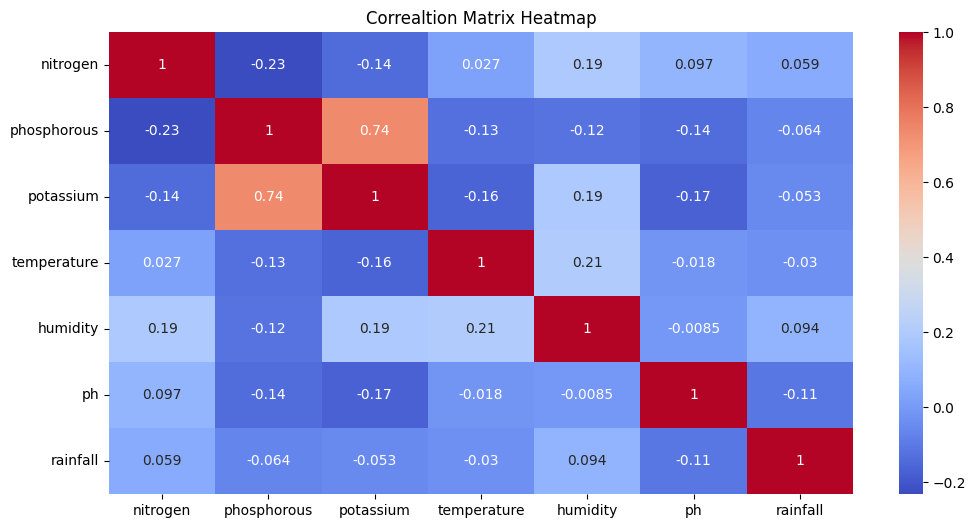

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correaltion Matrix Heatmap")
plt.show()

**SCATTER PLOTS**

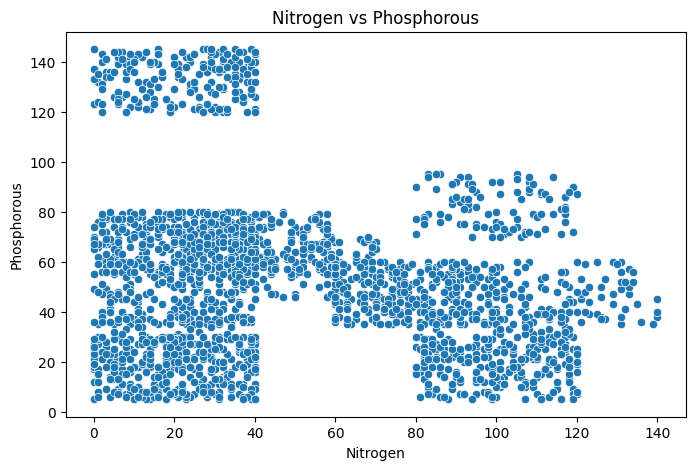

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='nitrogen', y='phosphorous', data=df)
plt.title("Nitrogen vs Phosphorous")
plt.xlabel("Nitrogen")
plt.ylabel("Phosphorous")
plt.show()

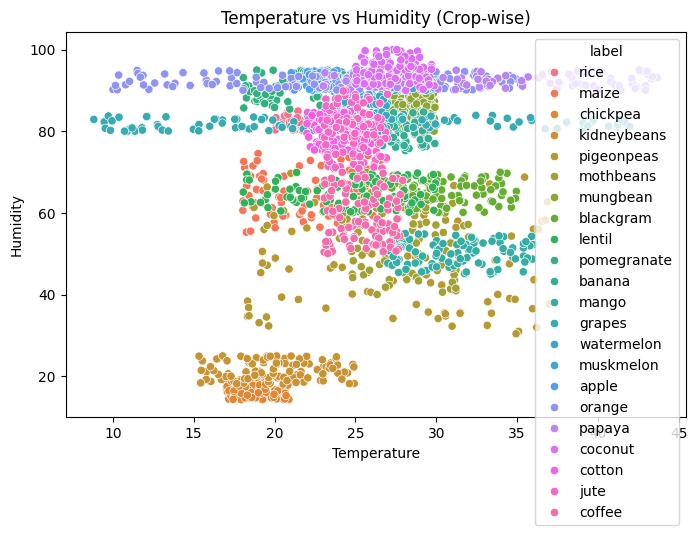

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='temperature', y='humidity', hue='label', data=df)
plt.title("Temperature vs Humidity (Crop-wise)")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()

**SPLITTING THE DATA**

In [19]:
x=df.drop('label',axis=1)

In [20]:
y=df['label']

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorous  2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [22]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2200 entries, 0 to 2199
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
2200 non-null   object
dtypes: object(1)
memory usage: 17.3+ KB


**TRAIN TEST SPLIT**

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1863 to 1061
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     1760 non-null   int64  
 1   phosphorous  1760 non-null   int64  
 2   potassium    1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [25]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1760 entries, 1863 to 1061
Series name: label
Non-Null Count  Dtype 
--------------  ----- 
1760 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


**TRAINING MODEL USING LOGISTIC REGRESSION**

In [26]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred1=model1.predict(x_test)

In [28]:
lr_acc=accuracy_score(y_test,y_pred1)
print("logistic regression accuracy is "+str(lr_acc))

logistic regression accuracy is 0.9704545454545455


In [29]:
lr_f1=f1_score(y_test,y_pred1,average="weighted")
print("logistic regression f1_score is "+str(lr_f1))

logistic regression f1_score is 0.9703871949992571


**TRAINING MODEL USING DECISION TREE**

In [30]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred2=model2.predict(x_test)

In [32]:
dt_acc=accuracy_score(y_test,y_pred2)
print("decision tree accuracy: "+str(dt_acc))

decision tree accuracy: 0.9954545454545455


In [33]:
dt_f1=f1_score(y_test,y_pred2,average="weighted")
print("decision tree f1_score is "+str(dt_f1))

decision tree f1_score is 0.9954324471245624


**TRAINING MODEL USING RANDOM FOREST**

In [34]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
y_pred3=model3.predict(x_test)

In [36]:
rf_acc=accuracy_score(y_test,y_pred3)
print("random forest accuracy: "+str(rf_acc))

random forest accuracy: 0.9977272727272727


In [37]:
rf_f1=f1_score(y_test,y_pred3,average="weighted")
print("random forest f1_score is "+str(rf_f1))

random forest f1_score is 0.9977040998217469


**CONFUSION MATRIX**

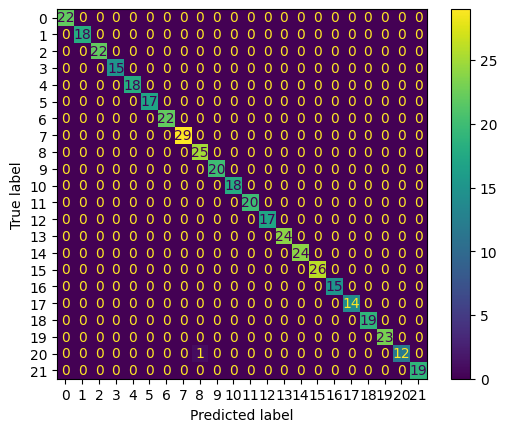

In [38]:
cm=confusion_matrix(y_test,y_pred3)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

**BAR GRAPH**

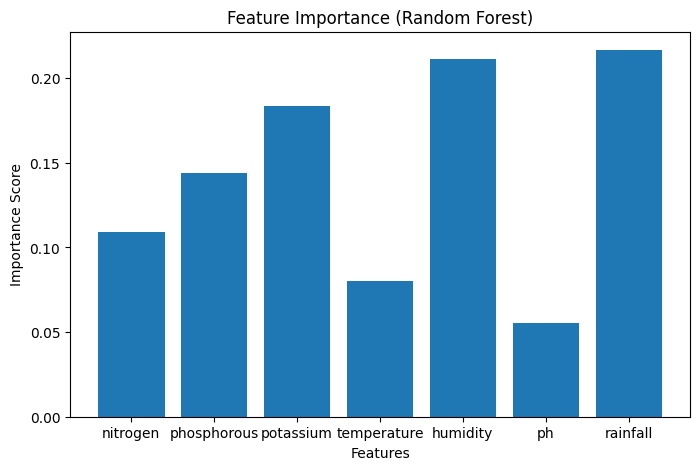

In [39]:
importances = model3.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(8,5))
plt.bar(feature_names, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [40]:
input=pd.DataFrame([[80,60,65,35,70,7,200]],columns=['nitrogen','phosphorous','potassium','temperature','humidity','ph','rainfall'])

In [41]:
model3.predict(input)

array(['jute'], dtype=object)

**IMPORTING PICKLE**

In [42]:
import pickle as pkl

In [43]:
pkl.dump(model3,open('Crop_recommendation.pkl','wb'))